Data Science Career Skills
With Python, Pandas, Plotly, Requests, and Beautiful Soup¶

In [3]:
# Import necessary libraries

import re
import time

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

The Plan
In this Jupyter notebook I'll show you how to scrape the data for job listings from Monster, SimplyHired, and Indeed.

Scrape the data for 2023¶

Add keywords to the search query

In [4]:
search_terms = [
    "",
    "Python",
    "SQL",
    "R",
    "Spark",
    "Hadoop",
    "Java",
    "Tableau",
    "AWS",
    "SAS",
    "Hive",
    "Scala",
    "Excel",
    "TensorFlow",
    "C++",
    "Azure",
    "NoSQL",
    "Linux",
    "C",
    "Matlab",
    "Scikit-learn",
    "Pandas",
    "Git",
    "Keras",
    "Javascript",
    "Pig",
    "Hbase",
    "Google Cloud",
    "Docker",
    "NumPy",
    "PyTorch",
    "C#",
    "SPSS",
    "MySQL",
    "Perl",
    "Cassandra",
    "MongoDB",
    "GCP",
    "Kubernetes",
    "D3",
    "Databricks",
    "postgresql",
    "Caffe",
    "Airflow",
    "Alteryx",
    "BigQuery",
    "Fastai",
]

Indeed
Define a function to scrape the data for job listings from Indeed.

In [5]:
def get_indeed_jobs():
    # read search terms from csv into a list
    df = pd.DataFrame({
        'Name': search_terms,
        'Indeed': [0 for i in range(len(search_terms))],
        # 'Monster': [0 for i in range(len(search_terms))],
        # 'Simply': [0 for i in range(len(search_terms))],

    })

    indeed_list = []

    driver = webdriver.Chrome()

    for term in search_terms:
        try:
            url = f'https://www.indeed.com/jobs?q=%22data+scientist%22+%22{term}%22&l=United+States'
            driver.get(url)
            jobs_element = driver.find_element(By.XPATH, '//*[@id="jobsearch-JapanPage"]/div/div/div[5]/div[1]/div[4]/div/div/div[2]/span[1]')
            jobs = jobs_element.text
            job_numbers = jobs.split(' ')[0].replace(',', '')
            df.loc[df['Name'] == term, 'Indeed'] = job_numbers
            print(df)
            df.loc[df['Name'] == '', 'Name'] = "Data Scientist"

        except:
            print(f'error: {term}')
    driver.quit()
    return df

Simply Hired
Define a function to scrape the data for job listings from Simply Hired.


In [6]:
def get_simply_hired():
    df = pd.DataFrame({
        'Name': search_terms,
        # 'Indeed': [0 for i in range(len(search_terms))],
        # 'Monster': [0 for i in range(len(search_terms))],
        'Simply': [0 for i in range(len(search_terms))],

    })
    simply_list = []
    driver = webdriver.Chrome()

    for term in search_terms:
        url = f'https://www.simplyhired.com/search?q=%22data+scientist%22+%22{term}%22&l=United+States'

        try:
            driver.get(url)
            count = driver.find_element(By.XPATH, '//*[@id="__next"]/div/main/div/div[1]/div[4]/p').text
            df.loc[df['Name'] == term, 'Simply'] = count
            print(df)
            df.loc[df['Name'] == '', 'Name'] = "Data Scientist"

        except Exception as e:
            print(f'error: {e}')
    return df

Run each function

In [7]:
df_indeed = get_indeed_jobs()
df_simply = get_simply_hired()

df_indeed
df_simply


C:\Users\Admin\AppData\Local\Temp\ipykernel_7968\2328145985.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4512' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Name'] == term, 'Indeed'] = job_numbers


            Name Indeed
0                  4512
1         Python      0
2            SQL      0
3              R      0
4          Spark      0
5         Hadoop      0
6           Java      0
7        Tableau      0
8            AWS      0
9            SAS      0
10          Hive      0
11         Scala      0
12         Excel      0
13    TensorFlow      0
14           C++      0
15         Azure      0
16         NoSQL      0
17         Linux      0
18             C      0
19        Matlab      0
20  Scikit-learn      0
21        Pandas      0
22           Git      0
23         Keras      0
24    Javascript      0
25           Pig      0
26         Hbase      0
27  Google Cloud      0
28        Docker      0
29         NumPy      0
30       PyTorch      0
31            C#      0
32          SPSS      0
33         MySQL      0
34          Perl      0
35     Cassandra      0
36       MongoDB      0
37           GCP      0
38    Kubernetes      0
39            D3      0
40    Databricks

C:\Users\Admin\AppData\Local\Temp\ipykernel_7968\2163568430.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2891' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Name'] == term, 'Simply'] = count


            Name Simply
0                  2891
1         Python      0
2            SQL      0
3              R      0
4          Spark      0
5         Hadoop      0
6           Java      0
7        Tableau      0
8            AWS      0
9            SAS      0
10          Hive      0
11         Scala      0
12         Excel      0
13    TensorFlow      0
14           C++      0
15         Azure      0
16         NoSQL      0
17         Linux      0
18             C      0
19        Matlab      0
20  Scikit-learn      0
21        Pandas      0
22           Git      0
23         Keras      0
24    Javascript      0
25           Pig      0
26         Hbase      0
27  Google Cloud      0
28        Docker      0
29         NumPy      0
30       PyTorch      0
31            C#      0
32          SPSS      0
33         MySQL      0
34          Perl      0
35     Cassandra      0
36       MongoDB      0
37           GCP      0
38    Kubernetes      0
39            D3      0
40    Databricks

,Name,Simply
0,Data Scientist,2891
1,Python,2213
2,SQL,1614
3,R,1268
4,Spark,572
5,Hadoop,352
6,Java,423
7,Tableau,623
8,AWS,618
9,SAS,308


Combine dataframes to a single dataframe for analysis

In [8]:
df = df_indeed.merge(df_simply, on='Name', how='outer')
df.set_index('Name', inplace=True)

for col in df.columns:
    df[col] = df[col].astype(float)

df.info()

df

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Data Scientist to Fastai
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Indeed  47 non-null     float64
 1   Simply  47 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


,Indeed,Simply
Name,,
Data Scientist,4512.0,2891.0
Python,3575.0,2213.0
SQL,2218.0,1614.0
R,1747.0,1268.0
Spark,877.0,572.0
Hadoop,493.0,352.0
Java,608.0,423.0
Tableau,821.0,623.0
AWS,938.0,618.0


Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from IPython.core.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
    
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

# for color scales in plotly
import colorlover as cl 


pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\Admin\AppData\Local\Temp\ipykernel_7968\1016329995.py:5: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



Total listings with 'Data Scientist' for Indeed, and SimplyHired



In [11]:
total_ds_jobs = list(df.iloc[0])
total_ds_jobs

[4512.0, 2891.0]

These are the totals for 2023 for "Data Scientist" alone:
Therefore delete them

In [12]:
df = df.drop('Data Scientist')
df

,Indeed,Simply
Name,,
Python,"3,575.00","2,213.00"
SQL,"2,218.00","1,614.00"
R,"1,747.00","1,268.00"
Spark,877.00,572.00
Hadoop,493.00,352.00
Java,608.00,423.00
Tableau,821.00,623.00
AWS,938.00,618.00
SAS,372.00,308.00


Fill NA

In [14]:
df = df.fillna(0)
df

,Indeed,Simply
Name,,
Python,"3,575.00","2,213.00"
SQL,"2,218.00","1,614.00"
R,"1,747.00","1,268.00"
Spark,877.00,572.00
Hadoop,493.00,352.00
Java,608.00,423.00
Tableau,821.00,623.00
AWS,938.00,618.00
SAS,372.00,308.00


Write out file
Get today's date.

In [15]:
import datetime
today = datetime.date.today()
df.to_csv(f'tech_skills_{today}.csv')
percent_df = df/total_ds_jobs
percent_df


,Indeed,Simply
Name,,
Python,0.79,0.77
SQL,0.49,0.56
R,0.39,0.44
Spark,0.19,0.20
Hadoop,0.11,0.12
Java,0.13,0.15
Tableau,0.18,0.22
AWS,0.21,0.21
SAS,0.08,0.11


In [16]:
percent_df['avg'] = percent_df.mean(axis=1)
percent_df

,Indeed,Simply,avg
Name,,,
Python,0.79,0.77,0.78
SQL,0.49,0.56,0.52
R,0.39,0.44,0.41
Spark,0.19,0.20,0.20
Hadoop,0.11,0.12,0.12
Java,0.13,0.15,0.14
Tableau,0.18,0.22,0.20
AWS,0.21,0.21,0.21
SAS,0.08,0.11,0.09


Read 2019 data

In [59]:
total_2019 = {
    'Indeed': 32127,
    'Simply': 22657,
}

df_2019 = pd.read_csv('2019.csv')
df_2019.index = df_2019['Keyword']
df_2019

,Keyword,Indeed,Simply
Keyword,,,
Python,Python,4305,3141
SQL,SQL,3163,2249
R,R,3105,2344
Spark,Spark,1691,1147
Hadoop,Hadoop,1574,1070
Java,Java,1457,1008
Tableau,Tableau,1147,883
AWS,AWS,1235,788
SAS,SAS,965,736


Parse into floats

In [60]:
a = 0
for col in df_2019.columns:
    if a == 0:
        continue
    df_2019[col] = df_2019[col].astype(float)
    a+=1
    

first_column = df_2019.columns[0]
df_2019.drop(first_column, axis=1, inplace=True)

df_2019



,Indeed,Simply
Keyword,,
Python,4305,3141
SQL,3163,2249
R,3105,2344
Spark,1691,1147
Hadoop,1574,1070
Java,1457,1008
Tableau,1147,883
AWS,1235,788
SAS,965,736


Convert to percentages

In [61]:
df_2019_percent = df_2019/total_2019
df_2019_percent


,Indeed,Simply
Keyword,,
Python,0.13,0.14
SQL,0.10,0.10
R,0.10,0.10
Spark,0.05,0.05
Hadoop,0.05,0.05
Java,0.05,0.04
Tableau,0.04,0.04
AWS,0.04,0.03
SAS,0.03,0.03


Make the average for 2019.


In [62]:
df_2019_percent['avg'] = df_2019_percent.mean(axis=1)
df_2019_percent

,Indeed,Simply,avg
Keyword,,,
Python,0.13,0.14,0.14
SQL,0.10,0.10,0.10
R,0.10,0.10,0.10
Spark,0.05,0.05,0.05
Hadoop,0.05,0.05,0.05
Java,0.05,0.04,0.04
Tableau,0.04,0.04,0.04
AWS,0.04,0.03,0.04
SAS,0.03,0.03,0.03


Merge 2019 and 2023

In [63]:
df_combo = df_2019_percent.merge(percent_df, left_index=True, right_index=True, how='outer')
df_combo

,Indeed_x,Simply_x,avg_x,Indeed_y,Simply_y,avg_y
Python,0.13,0.14,0.14,0.79,0.77,0.78
SQL,0.10,0.10,0.10,0.49,0.56,0.52
R,0.10,0.10,0.10,0.39,0.44,0.41
Spark,0.05,0.05,0.05,0.19,0.20,0.20
Hadoop,0.05,0.05,0.05,0.11,0.12,0.12
Java,0.05,0.04,0.04,0.13,0.15,0.14
Tableau,0.04,0.04,0.04,0.18,0.22,0.20
AWS,0.04,0.03,0.04,0.21,0.21,0.21
SAS,0.03,0.03,0.03,0.08,0.11,0.09
Hive,0.03,0.02,0.03,0.06,0.07,0.06


In [64]:
df_combo = df_combo.loc[:, ['avg_x', 'avg_y']]
df_combo.columns=['2019', '2023']
df_combo = df_combo.sort_values(by='2023', ascending=False)
df_combo

,2019,2023
Python,0.14,0.78
SQL,0.10,0.52
R,0.10,0.41
TensorFlow,0.03,0.21
AWS,0.04,0.21
Tableau,0.04,0.20
Spark,0.05,0.20
PyTorch,0.01,0.19
Azure,0.02,0.15
Java,0.04,0.14


Top 20


In [66]:
df_23 = df_combo.iloc[:20]
df_23

,2019,2023
Python,0.14,0.78
SQL,0.10,0.52
R,0.10,0.41
TensorFlow,0.03,0.21
AWS,0.04,0.21
Tableau,0.04,0.20
Spark,0.05,0.20
PyTorch,0.01,0.19
Azure,0.02,0.15
Java,0.04,0.14


TOP 20 Bar Chart

<Axes: >

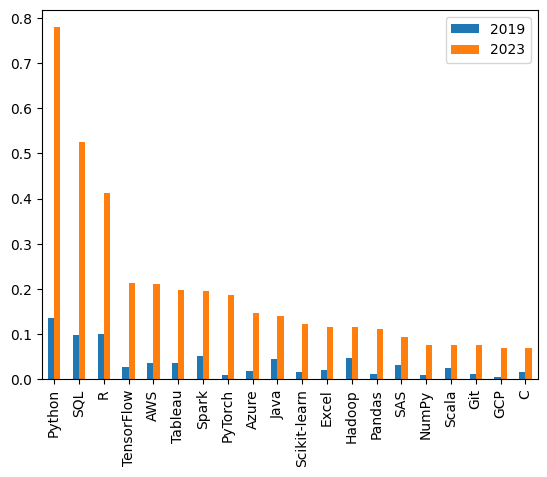

In [67]:
df_23.plot(kind='bar')

2023 bar chart

<Axes: >

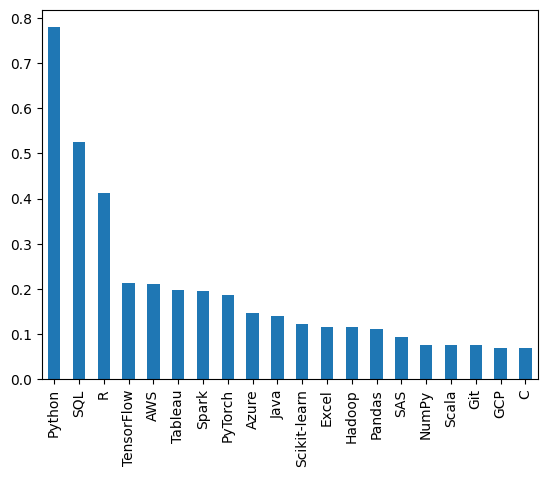

In [68]:
df_2023 = df_23['2023']
df_2023.plot(kind='bar')

2019 bar chart

<Axes: >

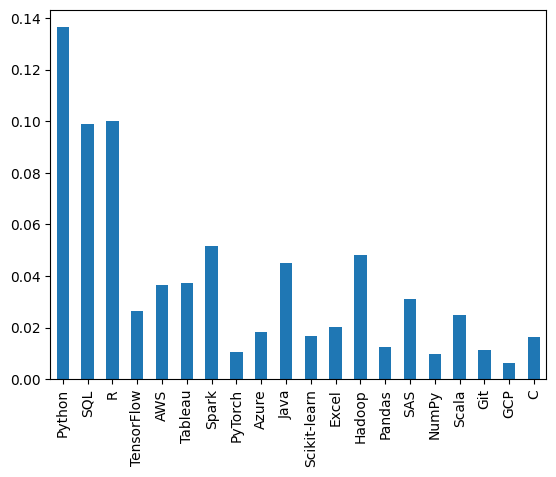

In [74]:
df_2019 = df_23['2019']
df_2019.plot(kind='bar')

Let's make pretty, interactive charts in Plotly!


In [73]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 20)

data = [
    go.Bar(
        x=df_23.index,          
        y=df_23['2023']*100,
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
     'title': 'Technologies in Data Scientist Job Listings 2023',
    'yaxis': {'title': 'Avg % of Listings', },
    'xaxis': {'title': "Technology", 'tickmode': 'linear'},
    'title_x':0.5,
    'height': 500
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Top 15

In [71]:
df_15 = df_combo.iloc[:15]
df_15

,2019,2023
Python,0.14,0.78
SQL,0.10,0.52
R,0.10,0.41
TensorFlow,0.03,0.21
AWS,0.04,0.21
Tableau,0.04,0.20
Spark,0.05,0.20
PyTorch,0.01,0.19
Azure,0.02,0.15
Java,0.04,0.14


In [75]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 15)

data = [
    go.Bar(
        x=df_15.index,          
        y=df_15['2023']*100,
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
     'title': 'Technologies in Data Scientist Job Listings 2023',
    'yaxis': {'title': 'Avg % of Listings', },
    'xaxis': {'title': "Technology", 'tickmode': 'linear'},
    'title_x':0.5,
    'height': 500
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Looking at just the top 10 for 2019

In [76]:
df_10 = df_combo.iloc[:10]
df_10

,2019,2023
Python,0.14,0.78
SQL,0.10,0.52
R,0.10,0.41
TensorFlow,0.03,0.21
AWS,0.04,0.21
Tableau,0.04,0.20
Spark,0.05,0.20
PyTorch,0.01,0.19
Azure,0.02,0.15
Java,0.04,0.14


<Axes: title={'center': 'Most In Demand Data Science Tech Skills'}>

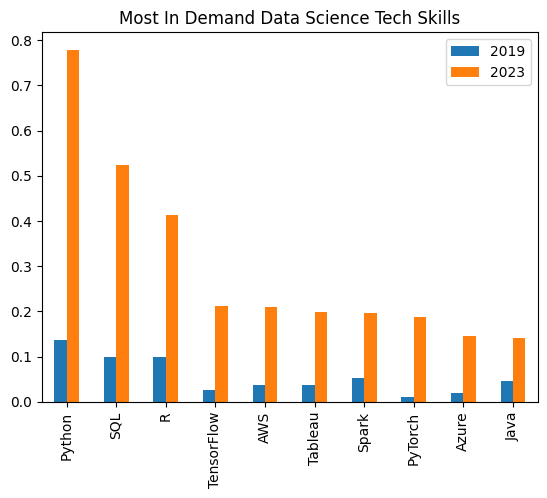

In [77]:
df_10.plot(kind='bar', title='Most In Demand Data Science Tech Skills')

In [78]:
df_10 = df_10.sort_values(by='2023')


In [79]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 10)

data = [
    go.Bar(
        y=df_10.index,          
        x=df_10['2023'] * 100,
        orientation='h',
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
    'title': 'Technologies in Data Scientist Job Listings 2023',
    'yaxis': {'title': 'Software', 'tickmode': 'linear'},
    'xaxis': {'title': "Avg % of Listings"},
    'title_x':0.5,
    'height': 500
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Bigger DF with at least 5% of listings average in 2019

In [96]:
df_over_five = df_combo[df_combo['2023']>=.05]
df_over_five

,2019,2023
Python,0.14,0.78
SQL,0.10,0.52
R,0.10,0.41
TensorFlow,0.03,0.21
AWS,0.04,0.21
Tableau,0.04,0.20
Spark,0.05,0.20
PyTorch,0.01,0.19
Azure,0.02,0.15
Java,0.04,0.14


2019 Averages Chart

In [82]:
df_over_five_g = df_over_five.sort_values(by='2019', ascending=True)


In [83]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(
        y=df_over_five_g.index,          
        x=df_over_five_g['2019']*100,
        orientation='h',
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
    'title': 'Technologies in Data Scientist Job Listings 2019',
    'xaxis': {'title': 'Avg % of Listings', },
    'yaxis': {'tickmode': 'linear'},
    'title_x':0.5,
    'height': 700
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

2023 Averages Chart

In [84]:
df_over_five_g = df_over_five.sort_values(by='2023', ascending=True)

In [85]:
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(
        y=df_over_five_g.index,          
        x=df_over_five_g['2019']*100,
        orientation='h',
        marker=dict(
            colorscale='Jet',
            color=color_s
        ),
    )
]

layout = {
    'title': 'Technologies in Data Scientist Job Listings 2019',
    'xaxis': {'title': 'Avg % of Listings', },
    'yaxis': {'tickmode': 'linear'},
    'title_x':0.5,
    'height': 700
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


Compute % change

In [86]:
df_over_five_changes = df_over_five.copy()
df_over_five_changes['Change in Avg'] = df_over_five_changes['2023'] - df_over_five_changes['2019']
df_over_five_changes =  df_over_five_changes.sort_values(by = 'Change in Avg', ascending=False)
df_over_five_changes

,2019,2023,Change in Avg
Python,0.14,0.78,0.64
SQL,0.10,0.52,0.43
R,0.10,0.41,0.31
TensorFlow,0.03,0.21,0.19
PyTorch,0.01,0.19,0.18
AWS,0.04,0.21,0.17
Tableau,0.04,0.20,0.16
Spark,0.05,0.20,0.14
Azure,0.02,0.15,0.13
Scikit-learn,0.02,0.12,0.11


In [87]:
pct_change = df_over_five.pct_change(axis=1).sort_values(by='2019', ascending=True) 
pct_change

,2019,2023
Python,NaN,4.71
SQL,NaN,4.31
R,NaN,3.13
TensorFlow,NaN,7.03
AWS,NaN,4.76
Tableau,NaN,4.32
Spark,NaN,2.80
PyTorch,NaN,16.42
Azure,NaN,6.90
Java,NaN,2.13


In [88]:
pct_change = pct_change.drop('2019', axis=1)
pct_change.columns = ['% Change']
pct_change

,% Change
Python,4.71
SQL,4.31
R,3.13
TensorFlow,7.03
AWS,4.76
Tableau,4.32
Spark,2.80
PyTorch,16.42
Azure,6.90
Java,2.13


DataFrame 

In [89]:
df_over_five_all = df_over_five_changes.merge(pct_change, right_index=True, left_index=True)
df_over_five_all = df_over_five_all * 100
df_over_five_all.index.name = 'Keyword'

In [90]:
df_over_five_all

,2019,2023,Change in Avg,% Change
Keyword,,,,
Python,13.63,77.89,64.26,471.40
SQL,9.89,52.49,42.61,431.00
R,10.01,41.29,31.28,312.68
TensorFlow,2.65,21.30,18.65,703.11
PyTorch,1.07,18.68,17.61,"1,642.19"
AWS,3.66,21.08,17.42,475.87
Tableau,3.73,19.87,16.14,432.25
Spark,5.16,19.61,14.45,279.85
Azure,1.85,14.65,12.79,689.80


Change in avg from 2019 to 2023

In [91]:
df_over_five_all_c = df_over_five_all.sort_values(by='Change in Avg', ascending=True)
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(
        y=df_over_five_all_c.index,          
        x=df_over_five_all_c['Change in Avg'],
        orientation='h',
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s
        ),
        
        
        # text=p_s_df['Score'],
        # textposition='outside',
        # textfont=dict(size=10)
    )
]

layout = {
    'title': 'Change in Avg % of Technologies in Data Scientist Job Listings 2019',
    'xaxis': {'title': 'Change in Avg %', 'tickmode': 'linear'},

    'title_x':0.5,
    'height': 700
    
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Percent change

In [92]:
df_over_five_all_c = df_over_five_all.sort_values(by='% Change', ascending=True)
cmax=50
cmin=200
color_s = np.linspace(cmin, cmax, 30)

data = [
    go.Bar(  
        y=df_over_five_all_c.index,          
        x=df_over_five_all_c['% Change'],
        orientation='h',
        marker=dict(
            colorscale='Jet',
            #cauto=True,
            color=color_s
        ),
    )
]

layout = {
    'title': '% Change in Technologies in Data Scientist Job Listings 2018 to 2019',
    'yaxis': {'tickmode': 'linear'},
    'xaxis': {'title': "% Change"},
    'title_x':0.5,
    'height': 700
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [93]:
df_over_five

,2019,2023
Python,0.14,0.78
SQL,0.10,0.52
R,0.10,0.41
TensorFlow,0.03,0.21
AWS,0.04,0.21
Tableau,0.04,0.20
Spark,0.05,0.20
PyTorch,0.01,0.19
Azure,0.02,0.15
Java,0.04,0.14


In [97]:

df_over_five['2023_rank']=df_over_five['2023'].rank(ascending=False)
df_over_five

,2019,2023,2023_rank
Python,0.14,0.78,1.00
SQL,0.10,0.52,2.00
R,0.10,0.41,3.00
TensorFlow,0.03,0.21,4.00
AWS,0.04,0.21,5.00
Tableau,0.04,0.20,6.00
Spark,0.05,0.20,7.00
PyTorch,0.01,0.19,8.00
Azure,0.02,0.15,9.00
Java,0.04,0.14,10.00


In [98]:
df_over_five['2019_rank']=df_over_five['2019'].rank(ascending=False)
df_over_five

,2019,2023,2023_rank,2019_rank
Python,0.14,0.78,1.00,1.00
SQL,0.10,0.52,2.00,3.00
R,0.10,0.41,3.00,2.00
TensorFlow,0.03,0.21,4.00,10.00
AWS,0.04,0.21,5.00,8.00
Tableau,0.04,0.20,6.00,7.00
Spark,0.05,0.20,7.00,4.00
PyTorch,0.01,0.19,8.00,24.00
Azure,0.02,0.15,9.00,16.00
Java,0.04,0.14,10.00,6.00


In [99]:
df_over_five['rank_change'] = df_over_five['2019_rank'] - df_over_five['2023_rank']
df_over_five

,2019,2023,2023_rank,2019_rank,rank_change
Python,0.14,0.78,1.00,1.00,0.00
SQL,0.10,0.52,2.00,3.00,1.00
R,0.10,0.41,3.00,2.00,-1.00
TensorFlow,0.03,0.21,4.00,10.00,6.00
AWS,0.04,0.21,5.00,8.00,3.00
Tableau,0.04,0.20,6.00,7.00,1.00
Spark,0.05,0.20,7.00,4.00,-3.00
PyTorch,0.01,0.19,8.00,24.00,16.00
Azure,0.02,0.15,9.00,16.00,7.00
Java,0.04,0.14,10.00,6.00,-4.00


Add rank to the table 


In [100]:

df_to_print = df_over_five_all.merge(df_over_five, left_index=True, right_index=True)
type(df_to_print)

pandas.core.frame.DataFrame

In [102]:
df_to_print = df_to_print.drop(['2019_y', '2023_y'],  axis = 'columns')
df_to_print

,2019_x,2023_x,Change in Avg,% Change,2023_rank,2019_rank,rank_change
Python,13.63,77.89,64.26,471.40,1.00,1.00,0.00
SQL,9.89,52.49,42.61,431.00,2.00,3.00,1.00
R,10.01,41.29,31.28,312.68,3.00,2.00,-1.00
TensorFlow,2.65,21.30,18.65,703.11,4.00,10.00,6.00
PyTorch,1.07,18.68,17.61,"1,642.19",8.00,24.00,16.00
AWS,3.66,21.08,17.42,475.87,5.00,8.00,3.00
Tableau,3.73,19.87,16.14,432.25,6.00,7.00,1.00
Spark,5.16,19.61,14.45,279.85,7.00,4.00,-3.00
Azure,1.85,14.65,12.79,689.80,9.00,16.00,7.00
Scikit-learn,1.66,12.18,10.51,631.87,11.00,19.00,8.00


In [103]:
df_to_print.columns = ['2019 Avg', '2023 Avg', 'Change in Avg', '% Change', '2023 Rank', '2019 Rank', 'Rank Change']
df_to_print

,2019 Avg,2023 Avg,Change in Avg,% Change,2023 Rank,2019 Rank,Rank Change
Python,13.63,77.89,64.26,471.40,1.00,1.00,0.00
SQL,9.89,52.49,42.61,431.00,2.00,3.00,1.00
R,10.01,41.29,31.28,312.68,3.00,2.00,-1.00
TensorFlow,2.65,21.30,18.65,703.11,4.00,10.00,6.00
PyTorch,1.07,18.68,17.61,"1,642.19",8.00,24.00,16.00
AWS,3.66,21.08,17.42,475.87,5.00,8.00,3.00
Tableau,3.73,19.87,16.14,432.25,6.00,7.00,1.00
Spark,5.16,19.61,14.45,279.85,7.00,4.00,-3.00
Azure,1.85,14.65,12.79,689.80,9.00,16.00,7.00
Scikit-learn,1.66,12.18,10.51,631.87,11.00,19.00,8.00


Reorder 2018 and 2019 rank columns



In [104]:
new_cols = ['2019 Avg', '2023 Avg', 'Change in Avg', '% Change', '2019 Rank', '2023 Rank', 'Rank Change']


In [105]:
df_to_print = df_to_print[new_cols]
df_to_print = df_to_print.sort_values(by='% Change', ascending=False)
df_to_print

,2019 Avg,2023 Avg,Change in Avg,% Change,2019 Rank,2023 Rank,Rank Change
PyTorch,1.07,18.68,17.61,"1,642.19",24.00,8.00,16.00
Databricks,0.41,6.28,5.86,"1,412.92",31.00,25.00,6.00
GCP,0.62,7.02,6.40,"1,037.22",30.00,19.00,11.00
Pandas,1.26,11.15,9.89,785.21,21.00,14.00,7.00
Kubernetes,0.64,5.22,4.58,717.72,29.00,29.00,0.00
TensorFlow,2.65,21.30,18.65,703.11,10.00,4.00,6.00
Azure,1.85,14.65,12.79,689.80,16.00,9.00,7.00
C#,0.91,6.99,6.08,668.26,28.00,21.00,7.00
NumPy,1.00,7.68,6.68,666.37,25.00,16.00,9.00
Scikit-learn,1.66,12.18,10.51,631.87,19.00,11.00,8.00


In [106]:
df_to_print.rename(index={'Matlab':'MATLAB'},inplace=True)


In [108]:
df_to_print.style.format("{:,.1f}")
df_to_print

,2019 Avg,2023 Avg,Change in Avg,% Change,2019 Rank,2023 Rank,Rank Change
PyTorch,1.07,18.68,17.61,"1,642.19",24.00,8.00,16.00
Databricks,0.41,6.28,5.86,"1,412.92",31.00,25.00,6.00
GCP,0.62,7.02,6.40,"1,037.22",30.00,19.00,11.00
Pandas,1.26,11.15,9.89,785.21,21.00,14.00,7.00
Kubernetes,0.64,5.22,4.58,717.72,29.00,29.00,0.00
TensorFlow,2.65,21.30,18.65,703.11,10.00,4.00,6.00
Azure,1.85,14.65,12.79,689.80,16.00,9.00,7.00
C#,0.91,6.99,6.08,668.26,28.00,21.00,7.00
NumPy,1.00,7.68,6.68,666.37,25.00,16.00,9.00
Scikit-learn,1.66,12.18,10.51,631.87,19.00,11.00,8.00
